In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

%matplotlib inline

In [25]:
dataset = pd.read_csv("heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
X = dataset.drop('target',axis=1)
y = dataset['target']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

In [29]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import ModelCheckpoint

In [30]:
X_train.shape, X_test.shape

((748, 13), (277, 13))

In [31]:
model = keras.Sequential([
    keras.layers.Dense(50,input_shape=(13,), activation='relu'),
    keras.layers.Dense(35, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# mini batch gradient descent
r = model.fit(X_train,y_train,epochs=50, batch_size=2,callbacks=[mc])

Epoch 1/50
352/374 [===========================>..] - ETA: 0s - loss: 0.6696 - accuracy: 0.5909
Epoch 00001: accuracy improved from -inf to 0.59893, saving model to best_model.h5
374/374 [==============================] - 1s 2ms/step - loss: 0.6643 - accuracy: 0.5989
Epoch 2/50
349/374 [==========================>...] - ETA: 0s - loss: 0.6541 - accuracy: 0.6633
Epoch 00002: accuracy improved from 0.59893 to 0.66845, saving model to best_model.h5
374/374 [==============================] - 1s 2ms/step - loss: 0.6500 - accuracy: 0.6684
Epoch 3/50
370/374 [============================>.] - ETA: 0s - loss: 0.6051 - accuracy: 0.6919
Epoch 00003: accuracy improved from 0.66845 to 0.69251, saving model to best_model.h5
374/374 [==============================] - 1s 2ms/step - loss: 0.6051 - accuracy: 0.6925
Epoch 4/50
351/374 [===========================>..] - ETA: 0s - loss: 0.6100 - accuracy: 0.6909
Epoch 00004: accuracy did not improve from 0.69251
374/374 [==============================] - 

In [32]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.8195


[0.36563804745674133, 0.8194946050643921]

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_30 (Dense)             (None, 35)                1785      
_________________________________________________________________
dense_31 (Dense)             (None, 25)                900       
_________________________________________________________________
dense_32 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_33 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 8         
Total params: 3,895
Trainable params: 3,895
Non-trainable params: 0
____________________________________________________

In [33]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

Text(51.0, 0.5, 'Real Values')

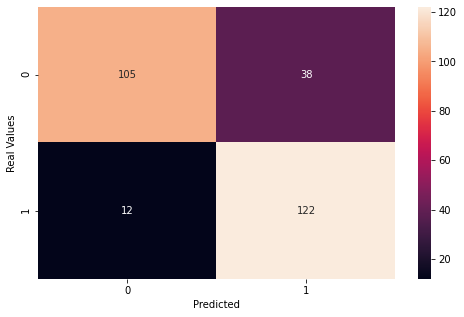

In [45]:
confusionMatrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(confusoinMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real Values')

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       143
           1       0.76      0.91      0.83       134

    accuracy                           0.82       277
   macro avg       0.83      0.82      0.82       277
weighted avg       0.83      0.82      0.82       277



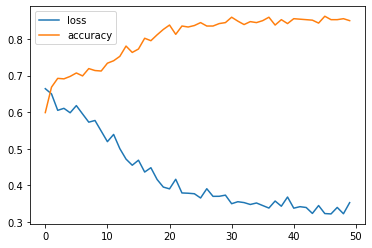

In [37]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["accuracy"],label="accuracy")
plt.legend()